Suorita GPS-anturilla vähintään muutaman minuutin mittaus, jonka aikana liikut ulkona kävellen, pyöräillen, rullaluis-
tellen tms. Havaintojesi perusteella:

a: Piirrä reitti kartalle käyttäen Folium-kirjastoa
b: Arvioi havaintojen luotettavuutta tarkastelemalla piirretyn reitin todenmukaisuutta
c: Tarkastele datasta sateliittien määrää (toimii vain Androidilla) ja havaintojen epätarkkuutta. Miten ne näkyvät karttakuvassa
d: Laske kuljettu matka käyttäen Haversinen kaavaa

In [5]:
import pandas as pd

df = pd.read_csv("GPSData.csv")

df.head()

,Time (s),Latitude (°),Longitude (°),Altitude (m),Altitude WGS84 (m),Speed (m/s),Direction (°),Distance (km),Horizontal Accuracy (m),Vertical Accuracy (m),Satellites
0,0.045542,65.029839,25.472664,NaN,NaN,NaN,NaN,0.161518,1100.000000,0.000000,-1.0
1,2.998125,65.030701,25.469895,3.790118,21.263580,0.0,NaN,0.190913,33.686844,37.092854,9.0
2,5.026893,65.030761,25.470505,11.392068,28.865500,0.0,NaN,0.194656,15.646051,39.275429,11.0
3,6.054276,65.030784,25.470447,9.361537,26.834983,0.0,NaN,0.196813,19.278666,43.936081,14.0
4,7.079059,65.030768,25.470424,8.545006,26.018447,0.0,NaN,0.203467,31.576254,105.223602,10.0


In [6]:
#Piirretään tässä kartta saadusta datasta

import folium

df_orig = df.copy()
df = df[df['Satellites'] > 14].reset_index(drop=True)

#Määritellään kartan keskipiste ja laajuus (mittakaava, zoomaus)
#Keskipiste on loogisesti mahdollisimman keskellä liikuttua reittiä 
lat_mean = df['Latitude (°)'].mean()
long_mean = df['Longitude (°)'].mean()

#luodaan kartta
my_map = folium.Map(location = [lat_mean, long_mean], zoom_start = 14)

#Piirretään reitti
folium.PolyLine(df[['Latitude (°)', 'Longitude (°)']], color = 'blue', opacity = 1).add_to(my_map)

#Tallennetaan kartta
my_map.save('Kartta_19092024.html')
my_map


b: Arvioi havaintojen luotettavuutta tarkastelemalla piirretyn reitin todenmukaisuutta:

Ihan hyvä luotettavuus, mutta tarkkuudessa on parannettavaa.

<function matplotlib.pyplot.show(close=None, block=None)>

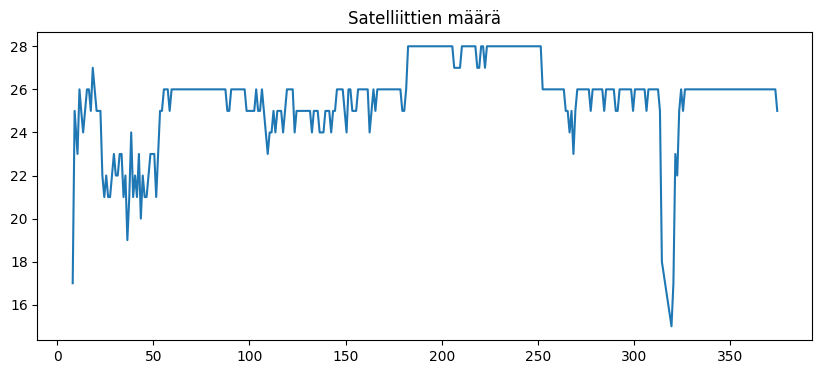

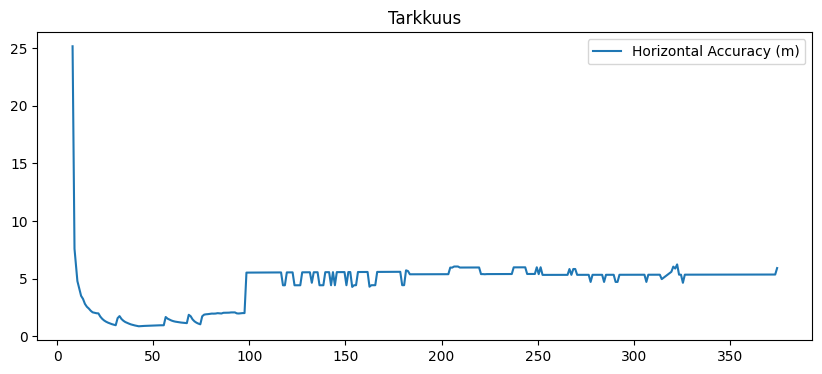

In [7]:
#Tuodaan kuvaajaan satelliittien määrä sekä tarkkuuslukemat

import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(df['Time (s)'], df['Satellites'])
plt.grid
plt.title('Satelliittien määrä')
plt.show

plt.figure(figsize=(10,4))
plt.plot(df['Time (s)'], df['Horizontal Accuracy (m)'])
#plt.plot(df['Time (s)'], df['Vertical Accuracy (m)'])
plt.legend(['Horizontal Accuracy (m)', 'Vertical Accuracy (m)'])
plt.grid
plt.title('Tarkkuus')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

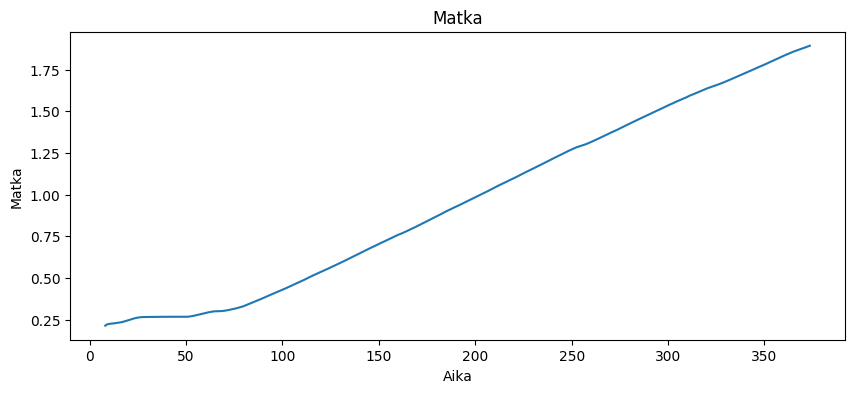

In [8]:
#Tuodaan matka ja siihen käytetty aika kuvaajaan

plt.figure(figsize=(10,4))
plt.plot(df['Time (s)'], df['Distance (km)'])
plt.grid
plt.title('Matka')
plt.ylabel('Matka')
plt.xlabel('Aika')
plt.show

In [9]:
import numpy as np
from math import radians, cos, sin, asin, sqrt

#Haversinen kaava pisteiden välimatkojen laskemiseen
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # Muunnetaan desimaaliasteet radiaaneiksi 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # Haversinen kaava
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Maapallon säde kilometreinä
    return c * r # Palauttaa koordinaattien välisen etäisyyden

In [10]:

# Matka on jo valmiiksi laskettu, mutta lasketaan se silti uusiksi Haversinen kaavalla raakadatasta

# Määritellään latitudi ja longitudi erikseen

lat = df['Latitude (°)']
lon = df['Longitude (°)']

df['dist'] = np.zeros(len(df)) # Alustetaan sarake etäisyydelle

for i in range(0,len(df)-1):
    df.loc[i, 'dist'] = haversine(lon[i], lat[i], lon[i + 1], lat[i + 1]) # Peräkkäisten pisteiden välimatka

df['tot_dist'] = np.cumsum(df['dist']) #Kokonaismatka
df

,Time (s),Latitude (°),Longitude (°),Altitude (m),Altitude WGS84 (m),Speed (m/s),Direction (°),Distance (km),Horizontal Accuracy (m),Vertical Accuracy (m),Satellites,dist,tot_dist
0,8.085651,65.030730,25.470313,16.972882,34.446319,1.555424,344.301849,0.212958,25.185387,62.155998,17.0,0.009491,0.009491
1,9.088983,65.030804,25.470210,22.846815,40.320289,2.285825,339.664520,0.221510,7.581930,14.453362,25.0,0.008552,0.018043
2,10.592294,65.030855,25.470075,22.818689,40.292194,2.024400,0.006814,0.224616,4.774168,8.133022,23.0,0.003106,0.021149
3,11.600316,65.030878,25.470035,22.832520,40.306037,2.124428,5.427273,0.226323,4.095939,6.937775,26.0,0.001707,0.022856
4,12.515495,65.030883,25.470001,22.330074,39.803596,2.183508,14.538651,0.226943,3.494630,5.909159,25.0,0.000620,0.023476
...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,370.520036,65.034181,25.493587,16.957711,34.430383,3.932351,2.955409,1.880390,5.345054,3.000000,26.0,0.004211,1.676909
359,371.520113,65.034219,25.493599,17.408682,34.881366,3.856812,6.635665,1.884696,5.345311,3.000000,26.0,0.004307,1.681216
360,372.520142,65.034257,25.493611,17.554893,35.027590,3.950359,11.691249,1.888488,5.345567,3.000000,26.0,0.003791,1.685008
361,373.520181,65.034290,25.493631,17.582473,35.055179,3.759641,15.593795,1.893350,5.345823,3.000000,26.0,0.004863,1.689870


<function matplotlib.pyplot.show(close=None, block=None)>

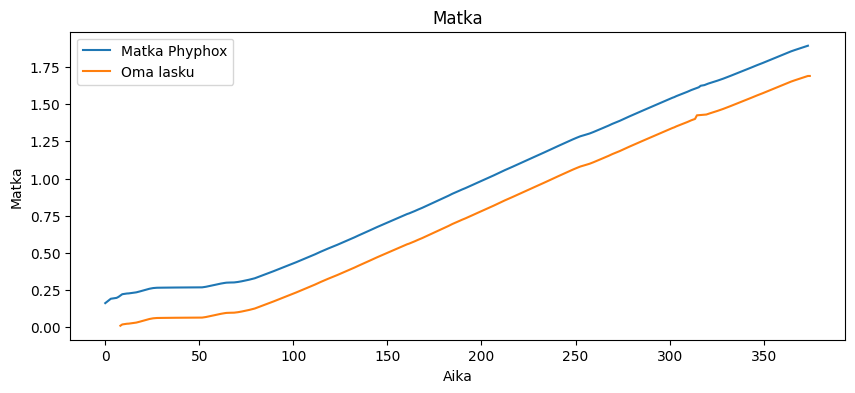

In [11]:
plt.figure(figsize=(10,4))
plt.plot(df_orig['Time (s)'], df_orig['Distance (km)'])
plt.plot(df['Time (s)'], df['tot_dist'])
plt.legend(['Matka Phyphox', 'Oma lasku'])
plt.grid
plt.title('Matka')
plt.ylabel('Matka')
plt.xlabel('Aika')
plt.show

Tulostetaan muistikirja PDF:ksi

In [12]:
NB_name='GPS'

!jupyter nbconvert --to html {NB_name}.ipynb

# Add custom CSS to the HTML file
html_file = f'{NB_name}.html'
with open(html_file, 'r', encoding='utf-8') as file:
    html_content = file.read()

custom_css = """
<style>
pre {
    background-color: #f5f5f5;
    border: 1px solid #ccc;
    padding: 10px;
    border-radius: 5px;
    overflow: auto;
}
code {
    background-color: #f5f5f5;
    border: 1px solid #ccc;
    padding: 2px 4px;
    border-radius: 3px;
}
</style>
"""

# Insert the custom CSS into the <head> section of the HTML file
html_content = html_content.replace('<head>', '<head>' + custom_css)

# Write the modified HTML content back to the file
with open(html_file, 'w', encoding='utf-8') as file:
    file.write(html_content)

# Convert HTML to PDF using wkhtmltopdf with --enable-local-file-access
!wkhtmltopdf --enable-local-file-access {NB_name}.html {NB_name}.pdf

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: kernel kernelspec migrate run troubleshoot

Jupyter command `jupyter-nbconvert` not found.
/bin/sh: line 1: wkhtmltopdf: command not found
